## Final Project Submission

Please fill out:
* Student name: Lauren Esser
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


from James: Try random forests, gradient boosted trees, consider support vector machines. 



## Introduction

The goal of this notebook is to predict which water pumps in Tanzania are function, which need repairs, and which pumps do not work at all. By gaining a better understanding of factors that impact these water pumps we are able to improve maintence and ensure all pumps stay functional.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import missingno as msno 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


## Obtain Data

> Data is taken from Taarifa and the Tanzanian Ministry of Water. 

In [2]:
data_labels = pd.read_csv('PumpData/TrainingLabels.csv')
data_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [3]:
#identify unique groups
data_labels.nunique()

id              59400
status_group        3
dtype: int64

In [4]:
#identify different statues of the pumps
data_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [5]:
data_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
id              59400 non-null int64
status_group    59400 non-null object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


<div class="alert alert-block alert-info">

**Data Labels is broken down into two groups ID and Status Group.** 

*Purpose*
- id: unique identifier of each water pump
- status_group: states if the water pump is functioning or not. 

*Numbers*
- id: 59400 unique values.
- status_group: 3 unique values. These values include: 
    - 32259 functional pumps
    - 22824 non-functional pumps
    - 4317 pumps that are functional but in need of repair.
    
*Data Types*
- id: int64
- status_group: object

In [6]:
data_values = pd.read_csv('PumpData/TrainingValues.csv')
#Set max columns to see all columns in df
pd.set_option('display.max_columns', None)
data_values.head(50)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [7]:
#unique vals per col
data_values.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

<div class="alert alert-block alert-info">

**Summary of each column**
> Information taken from drivendata.org. Click [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/#features_list) for access

- amount_tsh: Total static head (amount water available to waterpoint)
- date_recorded: The date the row was entered
- funder: Who funded the well
- gps_height: Altitude of the well
- installer: Organization that installed the well
- longitude: GPS coordinate
- latitude: GPS coordinate
- wpt_name: Name of the waterpoint if there is one
- num_private: *no information*
- basin: Geographic water basin
- subvillage: Geographic location
- region: Geographic location
- region_code: Geographic location (coded)
- district_code: Geographic location (coded)
- lga: Geographic location
- ward: Geographic location
- population: Population around the well
- public_meeting: True/False
- recorded_by: Group entering this row of data
- scheme_management: Who operates the waterpoint
- scheme_name: Who operates the waterpoint
- permit: If the waterpoint is permitted
- construction_year: Year the waterpoint was constructed
- extraction_type: The kind of extraction the waterpoint uses
- extraction_type_group: The kind of extraction the waterpoint uses
- extraction_type_class: The kind of extraction the waterpoint uses
- management: How the waterpoint is managed
- management_group: How the waterpoint is managed
- payment: What the water costs
- payment_type: What the water costs
- water_quality: The quality of the water
- quality_group: The quality of the water
- quantity: The quantity of water
- quantity_group: The quantity of water
- source: The source of the water
- source_type: The source of the water
- source_class: The source of the water
- waterpoint_type: The kind of waterpoint
- waterpoint_type_group: The kind of waterpoint

>***Columns that I could see having an impact on pump functionality***: gps_height, installer, geographic water basin, region, population, scheme_management, scheme_name, permit, construction_year, extraction_type, water_quality. 


> *Reading through the descriptions I can see that many columns share the same information. I will look through these columns and see what is worth keeping.*

In [8]:
data_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

**Values**
- int64 = 7 columns
- float64 = 3 columns
- object = 30 columns

## Scrub

### Check for Nulls

In [9]:
#identify nulls
data_labels.isna().sum()

id              0
status_group    0
dtype: int64

> No missing information in our labels dataframe. 

In [10]:
#identify nulls
data_values.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

>Need to take care of null values in funder, installer, subvillage, public_meeting, scheme_management, scheme_name, permit.

<AxesSubplot:>

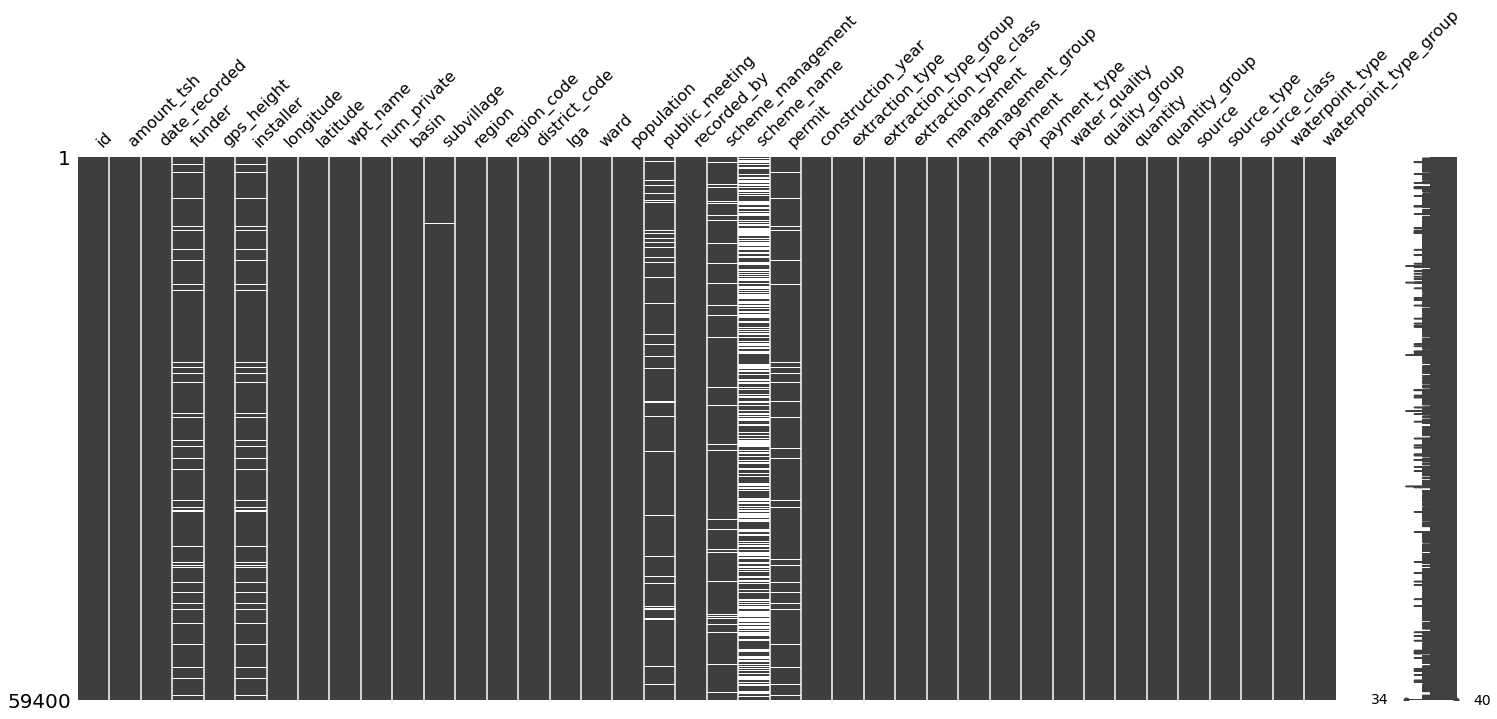

In [11]:
#visualize nulls
msno.matrix(data_values) 

> Looking at the matrix we can see that funder and installer have identical missing data in their rows. I will take care of these below.

### Data Value, Column Funder Nulls

In [12]:
#identify # of unique funders and how many pumps they funded
print('Data Value has {} unique Funders of pumps in Tanzania.'.format(len(data_values.funder.value_counts())))
data_values.funder.value_counts().head(50)

Data Value has 1897 unique Funders of pumps in Tanzania.


Government Of Tanzania            9084
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                                442
Amref                              425
Fini Water               

In [13]:
#Identify quantity of nulls
data_values.funder.isna().sum()

3635

3635 Null Values 

...as well as...


- Not Known (27)
- Unknown (4)
- Missio (2) Is that a place? - Missions Group so leave it.
- None (2)
- 0 did 777 pumps, I am going to assume this means zero as in they do not know who inserted the pumps.

In [14]:
#fill null with Unknown
data_values.funder.fillna('Unknown', inplace = True)

In [15]:
#confirm it worked
data_values.funder.isna().sum()

0

In [16]:
#Replace other placekeepers with Unknown as well
data_values.funder.replace(to_replace= ['Not Known', 'None', '0', 'NaN'], 
                           value= 'Unknown', inplace = True)

In [17]:
#Final check on funder column
data_values.funder.value_counts().head(50)

Government Of Tanzania            9084
Unknown                           4445
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                                442
Amref                              425
Fini Water               

### Data Values, Column Installer Nulls

In [18]:
#Identify # of installers, we can see this is more than the funders
print('Data Value has {} unique installers of pumps in Tanzania'.format(len(data_values.installer.value_counts())))
#max rows, wanted to get a feel of col
pd.set_option('display.max_rows', None)
data_values.installer.value_counts()

Data Value has 2145 unique installers of pumps in Tanzania


DWE                               17402
Government                         1825
RWE                                1206
Commu                              1060
DANIDA                             1050
KKKT                                898
Hesawa                              840
0                                   777
TCRS                                707
Central government                  622
CES                                 610
Community                           553
DANID                               552
District Council                    551
HESAWA                              539
LGA                                 408
World vision                        408
WEDECO                              397
TASAF                               396
District council                    392
Gover                               383
AMREF                               329
TWESA                               316
WU                                  301
Dmdd                                287


In [19]:
#check quantity of nulls
data_values.installer.isna().sum()

3655

3655 Null Value which is slightly higher than the funder column.

...as well as...

- 0 = 777
- Not known = 24
- not known = 17

In [20]:
#fill nulls with Unknown
data_values.installer.fillna('Unknown', inplace = True)

In [21]:
#fill other placekeepers with Unknown
data_values.installer.replace(to_replace= ['not known', 'Not known', 'None', 
                                           '0', 'NaN'], value= 'Unknown', 
                              inplace = True)

In [22]:
#Recheck Nulls
data_values.installer.isna().sum()

0

### Dropping Unneeded Columns

<AxesSubplot:>

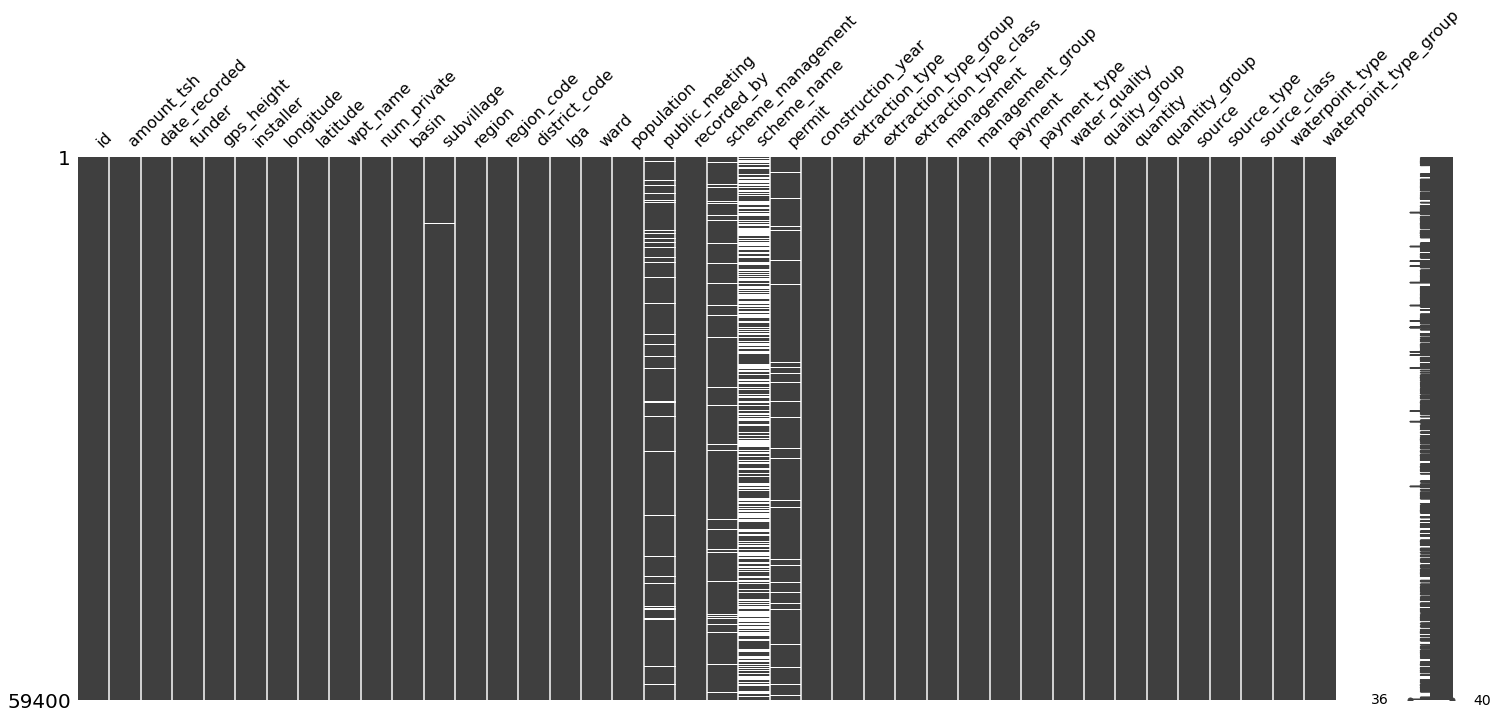

In [23]:
#Revisualize nulls
msno.matrix(data_values) 

#### Dropping Scheme Name

In [24]:
data_values.scheme_name.isna().value_counts()

False    31234
True     28166
Name: scheme_name, dtype: int64

In [25]:
data_values.scheme_management.isna().sum()

3877

>Scheme Management and Scheme Name are both described as "Who operates the waterpoint". Since there Scheme Name has over 28,000 Null values I will drop that column and keep Scheme Management in its place.

In [26]:
#Drop scheme name column
data_values = data_values.drop('scheme_name', axis = 1)

In [27]:
data_values.head(50)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


#### Dropping Waterpoint_type

>Waterpoint_type and Waterpoint_type_group have the same information. Looking at their value counts below I can see that it is identical except that waterpoint_type_group has more information on communal standpipe. Therefore I will drop waterpoint_type from the data frame. 

In [28]:
#Observe value counts
data_values.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [29]:
#Observe Value Counts
data_values.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [30]:
#Drop waterpoint_type column
data_values = data_values.drop('waterpoint_type', axis = 1)

#### Dropping Source_type and Source_class

In [31]:
#Observe Value Counts
data_values.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [32]:
#Observe Value Counts
data_values.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [33]:
#Observe Value Counts
data_values.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

>These three columns have a lot in column. Upon first glance I can see that source_class is the least useful of the three because it only specifies groundwater vs surface water. The other two columns specify the type of ground water or surface water making them more detailed and useful. *Therefore I will definitely drop source_class.*

>Looking at source vs source_type these two are very similar. Source splits river and lake into two categories as well as adding hand dtw. Upon researching I can see that a borehole is basically a smaller well that is dug by a machine dbh. I will keep source and drop souce_type since it is less detailed.

In [34]:
#Drop souce_class and source_type
data_values = data_values.drop(columns = ['source_class', 'source_type'], axis = 1)

In [35]:
data_values.head(50)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,hand pump


#### Drop quantity_group

In [36]:
#Observe Value Counts
data_values.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [37]:
#Observe Value Counts
data_values.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

These two columns have the exact same information. I will drop quantity_group as I do not need repeated information.

In [38]:
#Drop quantity_group
data_values = data_values.drop('quantity_group', axis = 1)

#### Dropping quality_group

In [39]:
#Observe Value Counts
data_values.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [40]:
#Observe Value Counts
data_values.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

Upon doing research **abandoned** can mean one of two things: 
1. Well was abandoned and is no longer in use - if so the well needs to be plugged or restored to its original hydrogelogical condition in order to prevent pollution and possible complications from mixing with other aquifiers.
2. Well is no longer being taken care of - this would mean it can be unsafe for the population to drink from.

**I will drop quality_group since the term abandoned carries important information**

In [41]:
#Drop quality_group
data_values = data_values.drop('quality_group', axis = 1)

#### Dropping Payment 

In [42]:
#Observe Value Counts
data_values.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [43]:
#Observe Value Counts
data_values.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

>These two columns have the exact same information. I will drop payment in order to keep only one column.

In [44]:
#Drop payment column
data_values = data_values.drop('payment', axis = 1)

#### Drop Date Recorded

Will not be using date recorded in my models.

In [45]:
data_values = data_values.drop('date_recorded', axis = 1)

#### Management

In [46]:
#Observe Value Counts
data_values.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [47]:
#Observe Value Counts
data_values.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

>For now I am going to keep both of these groups. Management_group states if the well is taken care of by commerce, the people actually using the well, or a political group. This may be interesting to look at later. Then the management column takes the groups and divides them into smaller groups. I could see later that a specific user-group is not taking care of the wells and we could target that subgroup more.

#### Dropping Extraction_type_group and extraction_type_class

In [48]:
#Observe Value Counts
data_values.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [49]:
#Observe Value Counts
data_values.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [50]:
#Observe Value Counts
data_values.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

>These three columns all answer the question "what kind of extraction the waterpoint uses" to varying degrees. I am going to keep the column extraction_type because it is the most specific.

In [51]:
#Drop extraction_type_class and group
data_values = data_values.drop(columns = ['extraction_type_class',
                                          'extraction_type_group'], axis = 1)

### Diving Deeper into other columns

#### Construction year

In [52]:
#Observe Value Counts
data_values.construction_year.value_counts().sort_index()

0       20709
1960      102
1961       21
1962       30
1963       85
1964       40
1965       19
1966       17
1967       88
1968       77
1969       59
1970      411
1971      145
1972      708
1973      184
1974      676
1975      437
1976      414
1977      202
1978     1037
1979      192
1980      811
1981      238
1982      744
1983      488
1984      779
1985      945
1986      434
1987      302
1988      521
1989      316
1990      954
1991      324
1992      640
1993      608
1994      738
1995     1014
1996      811
1997      644
1998      966
1999      979
2000     2091
2001      540
2002     1075
2003     1286
2004     1123
2005     1011
2006     1471
2007     1587
2008     2613
2009     2533
2010     2645
2011     1256
2012     1084
2013      176
Name: construction_year, dtype: int64

Looking at construction year there are 20,709 rows that do not have their construction year identified. I am going to assume that these pumps were built before those with valid data and assign the year 1959 to any marked 0.

In [53]:
#replace 0 with 1959
data_values.construction_year.replace(0, 1959, inplace=True)

In [54]:
#recheck value counts
data_values.construction_year.value_counts().sort_index()

1959    20709
1960      102
1961       21
1962       30
1963       85
1964       40
1965       19
1966       17
1967       88
1968       77
1969       59
1970      411
1971      145
1972      708
1973      184
1974      676
1975      437
1976      414
1977      202
1978     1037
1979      192
1980      811
1981      238
1982      744
1983      488
1984      779
1985      945
1986      434
1987      302
1988      521
1989      316
1990      954
1991      324
1992      640
1993      608
1994      738
1995     1014
1996      811
1997      644
1998      966
1999      979
2000     2091
2001      540
2002     1075
2003     1286
2004     1123
2005     1011
2006     1471
2007     1587
2008     2613
2009     2533
2010     2645
2011     1256
2012     1084
2013      176
Name: construction_year, dtype: int64

#### Scheme

In [55]:
data_values.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

>All data was entered by GeoData Consultants Ltd. I will keep this information here and delete this row from my data.

In [56]:
data_values = data_values.drop('recorded_by', axis = 1)

#### Public Meeting

In [57]:
#public meeting nulls
data_values.public_meeting.isna().sum()

3334

In [58]:
#Observe Value Counts
data_values.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [59]:
#fill nulls with True
data_values.public_meeting.fillna(True, inplace=True)

> Fill Null Values in Public Meeting with the majority which is True. Assume the well is in a public place.

#### Population

In [60]:
#Observe Value Counts
data_values.population.value_counts().sort_index(ascending = True)

0        21381
1         7025
2            4
3            4
4           13
5           44
6           19
7            3
8           23
9           11
10         163
11           7
12          43
13          12
14          18
15         193
16           8
17           6
18          18
19           3
20         462
21           3
22           9
23          27
24          16
25         255
26          11
27           5
28           9
29           7
30         626
31           1
32          17
33           9
34          10
35         245
36          57
37           4
38           9
39           3
40         552
41           3
42          29
43           7
44          10
45         205
46           7
47           4
48          22
49           9
50        1139
51           8
52          32
53          59
54          19
55         116
56         150
57          15
58          25
59          15
60         706
61           4
62           4
63          31
64           5
65         175
66        

In [61]:
#replace 0 with the median population
data_values.replace(0, (data_values.population.median()), inplace = True)

> Replace 0 with the median population for each well

#### Geographic Loation

In [62]:
#administrative division of a city 
data_values.ward.value_counts()

Igosi                      307
Imalinyi                   252
Siha Kati                  232
Mdandu                     231
Nduruma                    217
Kitunda                    203
Mishamo                    203
Msindo                     201
Chalinze                   196
Maji ya Chai               190
Usuka                      187
Ngarenanyuki               172
Chanika                    171
Vikindu                    162
Mtwango                    153
Matola                     145
Zinga/Ikerege              141
Wanging'ombe               139
Maramba                    139
Itete                      137
Magomeni                   135
Kikatiti                   134
Ifakara                    134
Olkokola                   133
Maposeni                   130
Igongolo                   129
Mvomero                    129
Mlangali                   125
Nkoma                      122
Nkungulu                   121
Mahongole                  121
Rujewa                     120
Simbo   

In [63]:
#specific village
data_values.subvillage.value_counts()

Madukani                          508
Shuleni                           506
Majengo                           502
Kati                              373
Mtakuja                           262
Sokoni                            232
M                                 187
Muungano                          172
Mbuyuni                           164
Mlimani                           152
Songambele                        147
Msikitini                         134
Miembeni                          134
1                                 132
Kibaoni                           114
Kanisani                          111
Mapinduzi                         109
I                                 109
Mjimwema                          108
Mjini                             108
Mkwajuni                          104
Mwenge                            102
Mabatini                           98
Azimio                             98
Mbugani                            95
Mission                            95
Bwawani     

In [64]:
#region of Tanzania
data_values.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [65]:
#will drop region code & use word instead
data_values.region_code.value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [66]:
#will drop district code & word instead
data_values.district_code.value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
25       23
80       12
67        6
Name: district_code, dtype: int64

In [67]:
#Drop region and district codes
data_values.drop(columns = ['region_code', 'district_code'], axis = 1, 
                 inplace = True)

In [68]:
#lga means local gov authority
data_values.lga.value_counts()

Njombe              2503
Arusha Rural        1252
Moshi Rural         1251
Bariadi             1177
Rungwe              1106
Kilosa              1094
Kasulu              1047
Mbozi               1034
Meru                1009
Bagamoyo             997
Singida Rural        995
Kilombero            959
Same                 877
Kibondo              874
Kyela                859
Kahama               836
Magu                 824
Kigoma Rural         824
Maswa                809
Karagwe              771
Mbinga               750
Iringa Rural         728
Serengeti            716
Namtumbo             694
Lushoto              694
Songea Rural         693
Mpanda               679
Mvomero              671
Ngara                669
Ulanga               665
Makete               630
Kwimba               627
Mbarali              626
Hai                  625
Rombo                594
Shinyanga Rural      588
Nzega                575
Ludewa               564
Mkuranga             560
Iramba               544


#### num_private

In [69]:
data_values.num_private.value_counts()

25      58655
6          81
1          73
5          46
8          46
32         40
45         36
15         35
39         30
93         28
3          27
7          26
2          23
65         22
47         21
4          20
102        20
17         17
80         15
20         14
11         11
34         10
41         10
16          8
120         7
150         6
22          6
12          5
24          5
50          5
58          4
10          4
9           4
38          4
14          3
61          3
27          2
26          2
23          1
131         1
35          1
450         1
60          1
55          1
668         1
30          1
672         1
160         1
1402        1
240         1
213         1
698         1
1776        1
136         1
180         1
42          1
87          1
755         1
300         1
280         1
141         1
62          1
111         1
94          1
Name: num_private, dtype: int64

>We have no information on what num_private is. Consider dropping. May keep for now to see if it plays a factor later.

### Take care of remaining Nulls

In [70]:
data_values.isna().sum()

id                          0
amount_tsh                  0
funder                      0
gps_height                  0
installer                   0
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                371
region                      0
lga                         0
ward                        0
population                  0
public_meeting              0
scheme_management        3877
permit                   3056
construction_year           0
extraction_type             0
management                  0
management_group            0
payment_type                0
water_quality               0
quantity                    0
source                      0
waterpoint_type_group       0
dtype: int64

In [71]:
data_values.dtypes

id                         int64
amount_tsh               float64
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
lga                       object
ward                      object
population                 int64
public_meeting              bool
scheme_management         object
permit                    object
construction_year          int64
extraction_type           object
management                object
management_group          object
payment_type              object
water_quality             object
quantity                  object
source                    object
waterpoint_type_group     object
dtype: object

In [72]:
#replace nulls with Unknown
data_values.subvillage.fillna('Unknown', inplace = True)

In [73]:
#replace nulls with Unknown
data_values.scheme_management.fillna('Unknown', inplace = True)

In [74]:
data_values.permit.value_counts()

True    38852
25.0    17492
Name: permit, dtype: int64

Assume 25 means no permit? Replace nulls and the number 25 with False.

In [75]:
data_values.permit.replace(25.0, 'False', inplace = True)

In [76]:
data_values.fillna('False', inplace = True)

In [77]:
data_values.isna().sum()

id                       0
amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
lga                      0
ward                     0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
management               0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type_group    0
dtype: int64

In [78]:
data_values.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,management_group,payment_type,water_quality,quantity,source,waterpoint_type_group
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,25,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,109,True,VWC,False,1999,gravity,vwc,user-group,annually,soft,enough,spring,communal standpipe
1,8776,25.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,25,Lake Victoria,Nyamara,Mara,Serengeti,Natta,280,True,Other,True,2010,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,25,Pangani,Majengo,Manyara,Simanjiro,Ngorika,250,True,VWC,True,2009,gravity,vwc,user-group,per bucket,soft,enough,dam,communal standpipe
3,67743,25.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,25,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,58,True,VWC,True,1986,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe
4,19728,25.0,Action In A,25,Artisan,31.130847,-1.825359,Shuleni,25,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,25,True,Unknown,True,1959,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe


In [79]:
data_values.shape

(59400, 27)

### Final Scrub Check

In [80]:
data_values.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000
mean,37115.132189,335.175216,676.899091,34.840053,-5.706033e+00,25.155539,188.908721,1983.631111
std,21453.127643,2995.738725,684.875135,3.104509,2.946019e+00,11.583768,468.189551,20.641015
min,1.000000,0.200000,-90.000000,25.000000,-1.164944e+01,1.000000,1.000000,1959.000000
25%,18519.750000,25.000000,25.000000,33.090347,-8.540621e+00,25.000000,25.000000,1959.000000
50%,37061.500000,25.000000,369.000000,34.908743,-5.021597e+00,25.000000,25.000000,1986.000000
75%,55656.500000,25.000000,1319.250000,37.178387,-3.326156e+00,25.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,30500.000000,2013.000000


## Explore

In [81]:
#set color palette for visualizations
sns.set_palette("Blues")

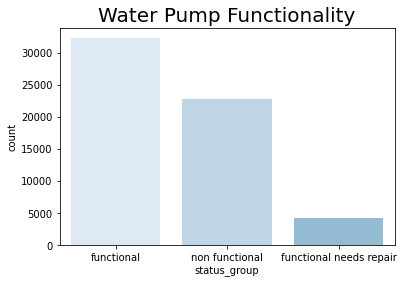

In [82]:
ax = sns.countplot(x= "status_group", data=data_labels);
ax.set_title("Water Pump Functionality", fontsize = 20);

<AxesSubplot:xlabel='status_group', ylabel='gps_height'>

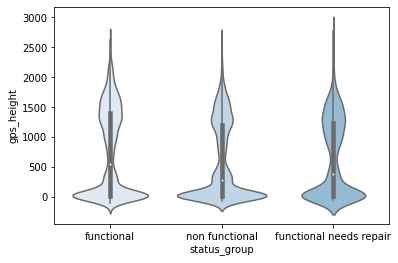

In [83]:
sns.violinplot(x = data_labels.status_group, y= data_values.gps_height)

<AxesSubplot:xlabel='status_group', ylabel='construction_year'>

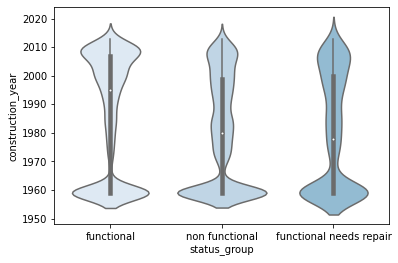

In [84]:
sns.violinplot(x = data_labels.status_group, y= data_values.construction_year)

<AxesSubplot:xlabel='status_group', ylabel='population'>

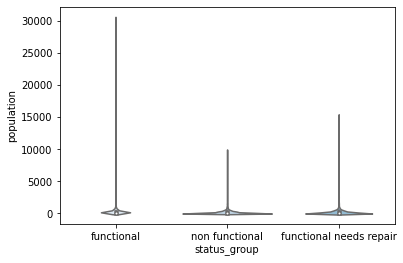

In [85]:
sns.violinplot(x = data_labels.status_group, y= data_values.population)

In [86]:
data_values.population.value_counts().sort_index()

1         7025
2            4
3            4
4           13
5           44
6           19
7            3
8           23
9           11
10         163
11           7
12          43
13          12
14          18
15         193
16           8
17           6
18          18
19           3
20         462
21           3
22           9
23          27
24          16
25       21636
26          11
27           5
28           9
29           7
30         626
31           1
32          17
33           9
34          10
35         245
36          57
37           4
38           9
39           3
40         552
41           3
42          29
43           7
44          10
45         205
46           7
47           4
48          22
49           9
50        1139
51           8
52          32
53          59
54          19
55         116
56         150
57          15
58          25
59          15
60         706
61           4
62           4
63          31
64           5
65         175
66           5
67        

Looks like population has 1 as a filler.

In [87]:
%%HTML 
<div class='tableauPlaceholder' id='viz1601559908930' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fu&#47;FunctionalityofWaterPumpsUsingLatitudeandLongitude&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='FunctionalityofWaterPumpsUsingLatitudeandLongitude&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fu&#47;FunctionalityofWaterPumpsUsingLatitudeandLongitude&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1601559908930');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<div class="alert alert-block alert-info">
The above map is interactive. Feel free to select which status groups you would like to see. You may select one, two, or all. 

### Scale Num Cols

In [88]:
data_values = data_values.drop(columns = ['funder', 'wpt_name', 'subvillage', 'lga',
                                 'ward', 'management_group', 'scheme_management'])

In [90]:
#list of numeric data
num_cols = data_values.select_dtypes(include=['int64', 'float64']).columns

In [91]:
num_cols

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'population', 'construction_year'],
      dtype='object')

In [92]:
data_values[num_cols].head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year
0,69572,6000.0,1390,34.938093,-9.856322,25,109,1999
1,8776,25.0,1399,34.698766,-2.147466,25,280,2010
2,34310,25.0,686,37.460664,-3.821329,25,250,2009
3,67743,25.0,263,38.486161,-11.155298,25,58,1986
4,19728,25.0,25,31.130847,-1.825359,25,25,1959


In [93]:
##from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

In [94]:
#num_cols_scaled = scaler.fit_transform(data_values[num_col])

In [95]:
#num_cols_scaled

#### Dealing with Categoricals

In [96]:
#list of categorial columns
cat_col = data_values.select_dtypes('O').columns
cat_col

Index(['installer', 'basin', 'region', 'permit', 'extraction_type',
       'management', 'payment_type', 'water_quality', 'quantity', 'source',
       'waterpoint_type_group'],
      dtype='object')

In [97]:
#quantity of unique installers
data_values.installer.value_counts()

DWE                               17402
Unknown                            4476
Government                         1825
RWE                                1206
Commu                              1060
DANIDA                             1050
KKKT                                898
Hesawa                              840
TCRS                                707
Central government                  622
CES                                 610
Community                           553
DANID                               552
District Council                    551
HESAWA                              539
LGA                                 408
World vision                        408
WEDECO                              397
TASAF                               396
District council                    392
Gover                               383
AMREF                               329
TWESA                               316
WU                                  301
Dmdd                                287


Installer is important but I cannot OHE encode all of these into seperate columns. I will make the cut off 1000 and merge the remainder into Unknown. Code below comes from Orin Conn blog found [here](https://medium.com/analytics-vidhya/predicting-functionality-of-water-well-pumps-in-tanzania-using-random-forest-6c25844a517e).

In [98]:
# #cols = data_values.select_dtypes('O').columns
#data_values.installer = data_values.installer.apply(lambda x: x.map(x.value_counts()) >=1050, "Unknown")
#data_values.nunique()
#comeback and look how slicing the column. Maybe try without map or make cols just the one col.
# if I make this my own I don't need to site him. 

In [99]:
#limit how many installers will show in dataset. Source Orin Conn blog above
cols = [i for i in data_values.columns if type(data_values[i].iloc[1]) ==str]
data_values[cols] = data_values[cols].where(data_values[cols].apply(lambda x: x.map(x.value_counts())) >=1050, "Unknown")
data_values.nunique()

id                       59399
amount_tsh                  97
gps_height                2427
installer                    6
longitude                57516
latitude                 57517
num_private                 64
basin                        9
region                      21
population                1048
public_meeting               2
permit                       2
construction_year           55
extraction_type             10
management                   7
payment_type                 7
water_quality                4
quantity                     5
source                       6
waterpoint_type_group        4
dtype: int64

In [100]:
data_values.isna().sum()

id                       0
amount_tsh               0
gps_height               0
installer                0
longitude                0
latitude                 0
num_private              0
basin                    0
region                   0
population               0
public_meeting           0
permit                   0
construction_year        0
extraction_type          0
management               0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type_group    0
dtype: int64

In [101]:
cat_cols = data_values.select_dtypes('O').columns

In [102]:
data_values[cat_cols].dtypes

installer                object
basin                    object
region                   object
permit                   object
extraction_type          object
management               object
payment_type             object
water_quality            object
quantity                 object
source                   object
waterpoint_type_group    object
dtype: object

In [103]:
data_values.extraction_type.value_counts()

gravity          26780
nira/tanira       8154
other             6430
submersible       4764
swn 80            3670
mono              2865
india mark ii     2400
afridev           1770
ksb               1415
Unknown           1152
Name: extraction_type, dtype: int64

In [104]:
data_values[cat_cols].head()

,installer,basin,region,permit,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type_group
0,Unknown,Lake Nyasa,Iringa,False,gravity,vwc,annually,soft,enough,spring,communal standpipe
1,Unknown,Lake Victoria,Mara,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,Unknown,Pangani,Manyara,True,gravity,vwc,per bucket,soft,enough,Unknown,communal standpipe
3,Unknown,Ruvuma / Southern Coast,Mtwara,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe
4,Unknown,Lake Victoria,Kagera,True,gravity,Unknown,never pay,soft,seasonal,rainwater harvesting,communal standpipe


In [105]:
data_values.extraction_type.replace('swn 80', 'swneighty', inplace = True)

In [106]:
pd.get_dummies(data_values.installer).head()

,Commu,DANIDA,DWE,Government,RWE,Unknown
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [107]:
encoded_cat = pd.get_dummies(data_values, columns = cat_cols)
encoded_cat.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,population,public_meeting,construction_year,installer_Commu,installer_DANIDA,installer_DWE,installer_Government,installer_RWE,installer_Unknown,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,region_Unknown,permit_True,permit_False,extraction_type_Unknown,extraction_type_afridev,extraction_type_gravity,extraction_type_india mark ii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_submersible,extraction_type_swneighty,management_Unknown,management_parastatal,management_private operator,management_vwc,management_water board,management_wua,management_wug,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,water_quality_Unknown,water_quality_salty,water_quality_soft,water_quality_unknown,quantity_Unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,source_Unknown,source_machine dbh,source_rainwater harvesting,source_river,source_shallow well,source_spring,waterpoint_type_group_Unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_other
0,69572,6000.0,1390,34.938093,-9.856322,25,109,True,1999,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,8776,25.0,1399,34.698766,-2.147466,25,280,True,2010,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,34310,25.0,686,37.460664,-3.821329,25,250,True,2009,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,67743,25.0,263,38.486161,-11.155298,25,58,True,1986,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,19728,25.0,25,31.130847,-1.825359,25,25,True,1959,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


In [108]:
data_frame = encoded_cat.copy()

#### Train Test Split

Above I realized that I have too many categorical columns to one hot encode them all. Therefore I went through my data and removed additional columns.
>- funder: plays no role in well functionality.
- wpt_name: I have water basin instead
- subvillage: I am using region to see location
- lga: I am using region to see location
- ward: I am using region to see location
- management_group: I am using management in its place

In [109]:
y = data_labels.status_group
X = data_frame

In [110]:
#perform label encoding on y
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
y_encoded = lb_make.fit_transform(y)
y_encoded = pd.Series(y_encoded, index = y.index)

In [111]:
y_encoded.value_counts(normalize=True)

0    0.543081
2    0.384242
1    0.072677
dtype: float64

In [112]:
lb_make.inverse_transform([0, 1, 2])

array(['functional', 'functional needs repair', 'non functional'],
      dtype=object)

In [113]:
#Perform train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(44550, 90) (44550,)
(14850, 90) (14850,)


In [114]:
y_train.value_counts(1), y_test.value_counts(1)

(0    0.542334
 2    0.384871
 1    0.072795
 dtype: float64, 0    0.545320
 2    0.382357
 1    0.072323
 dtype: float64)

In [115]:
X_train.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'population', 'public_meeting', 'construction_year',
       'installer_Commu', 'installer_DANIDA', 'installer_DWE',
       'installer_Government', 'installer_RWE', 'installer_Unknown',
       'basin_Internal', 'basin_Lake Nyasa', 'basin_Lake Rukwa',
       'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani',
       'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu',
       'region_Arusha', 'region_Dodoma', 'region_Iringa', 'region_Kagera',
       'region_Kigoma', 'region_Kilimanjaro', 'region_Lindi', 'region_Manyara',
       'region_Mara', 'region_Mbeya', 'region_Morogoro', 'region_Mtwara',
       'region_Mwanza', 'region_Pwani', 'region_Rukwa', 'region_Ruvuma',
       'region_Shinyanga', 'region_Singida', 'region_Tabora', 'region_Tanga',
       'region_Unknown', 'permit_True', 'permit_False',
       'extraction_type_Unknown', 'extraction_type_afridev',
       'extracti

## Model

In [116]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

In [118]:
#upload required libraries
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Decision Tree

Go back through and show vanilla classifier visualize vs. final tree. 

In [119]:
#instantiate decision tree
tree_clf = DecisionTreeClassifier()

In [120]:
#fit decision tree
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [123]:
#Identify Accuracy Score
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(
    accuracy_score(y_test, predict) * 100))

Testing Accuracy for Decision Tree Classifier: 73.62%


In [122]:
#test set predictions
predict = tree_clf.predict(X_test)

#print conf matrix & class report
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[6335  514 1249]
 [ 494  378  202]
 [1221  237 4220]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      8098
           1       0.33      0.35      0.34      1074
           2       0.74      0.74      0.74      5678

    accuracy                           0.74     14850
   macro avg       0.62      0.63      0.62     14850
weighted avg       0.74      0.74      0.74     14850



In [165]:
print('CLASSIFICATION REPORT - Vanilla')
print('---' * 7)
print(classification_report(y_test, predict, target_names = ["functional", "functional, needs repair", "not functional"]))

CLASSIFICATION REPORT - Vanilla
---------------------
                          precision    recall  f1-score   support

              functional       0.79      0.78      0.78      8098
functional, needs repair       0.33      0.35      0.34      1074
          not functional       0.74      0.74      0.74      5678

                accuracy                           0.74     14850
               macro avg       0.62      0.63      0.62     14850
            weighted avg       0.74      0.74      0.74     14850



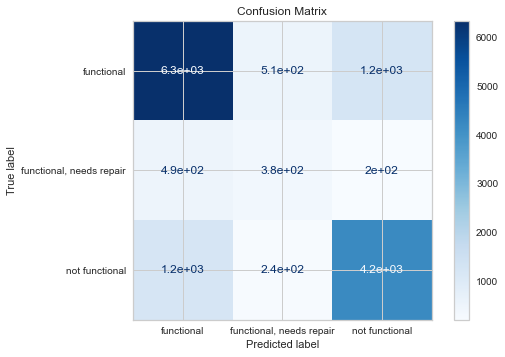

In [138]:
conf = plot_confusion_matrix(tree_clf, X_test, y_test, cmap = plt.cm.Blues, display_labels = ["functional", "functional, needs repair", "not functional"]);
conf.ax_.set_title('Confusion Matrix');

/Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


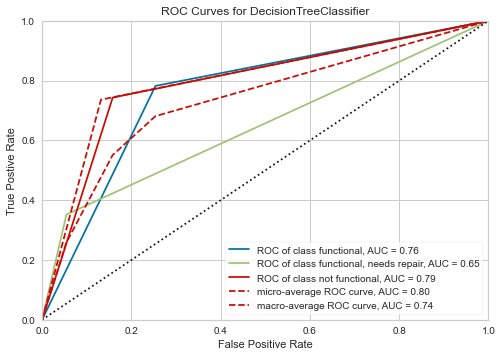

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [134]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(tree_clf, classes=["functional", "functional, needs repair", "not functional"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

<AxesSubplot:>

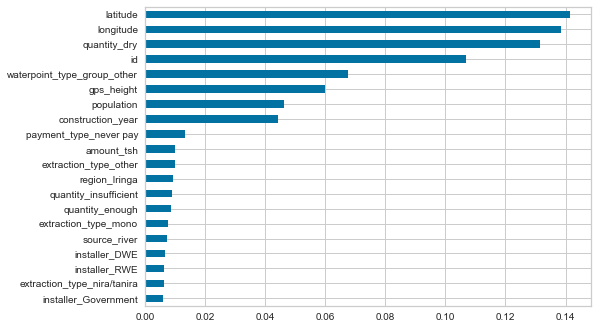

In [166]:
importance = pd.Series(tree_clf.feature_importances_,index=X_train.columns)
importance.sort_values().tail(20).plot(kind='barh')

In [139]:
def model_information(clf, X_test, y_test, predict):
    #classification report
    print('CLASSIFICATION REPORT')
    print('---' * 7)
    print(classification_report(y_test, predict, target_names = ["functional", "functional, needs repair", "not functional"]))
    
    #confusion matrix
    conf = plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Blues, display_labels = ["functional", "functional, needs repair", "not functional"]);
    conf.ax_.set_title('Confusion Matrix');
    
    #roc curve need to use Yellow Brick
    visualizer = ROCAUC(tree_clf, classes=["functional", "functional, needs repair", "not functional"])

    visualizer.fit(X_train, y_train)        
    visualizer.score(X_test, y_test)        
    visualizer.show()

## Bagged Trees

In [140]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(max_depth = 15))

In [141]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=15,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

In [142]:
bag_score = round((bagged_tree.score(X_train, y_train) * 100), 2)
print(f"Training Accuracy for Bagged Trees: {bag_score}%")

Training Accuracy for Bagged Trees: 83.95%


In [143]:
bag_test_score = round((bagged_tree.score(X_test, y_test) * 100), 2)
print(f"Testing Accuracy for Bagged Trees: {bag_test_score}%")

Testing Accuracy for Bagged Trees: 77.91%


## Random Forest

In [144]:
#Instantiate and fit rf
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
rf_train_score = round((rf.score(X_train, y_train) * 100), 2)
print(f"Training Accuracy for Random Forest: {rf_train_score}%")

Training Accuracy for Random Forest: 100.0%


In [146]:
rf_test_score = round((rf.score(X_test, y_test) * 100), 2)
print(f"Testing Accuracy for Random Forest: {rf_test_score}%")

Testing Accuracy for Random Forest: 79.95%


> Model is definitely overfit.

In [ ]:
model_information(rf, X_test, y_test, predict)

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 10, 15],
    'min_samples_split': [5, 10]
}

gs_rf = GridSearchCV(rf, param_grid, cv = 3)
gs_rf.fit(X_train, y_train)
print(f"Training Accuracy: {gs_rf.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {gs_rf.best_params_}")

>James normally does min_samples_leaf over min_samples_split. Recommended the top four.

>To deal with class imbalance you can select class_weight, try none, balance, balance subsample.

In [ ]:
gs_rf.best_estimator_

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
mean_rf_cv_score = np.mean(cross_val_score(rf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

## XBG RF CLASSIFIER

In [127]:
from xgboost import XGBRFClassifier

In [129]:
xbg = XGBRFClassifier()

##  Interpret

Thank you.